In [40]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Use gpu if available


In [41]:
if torch.cuda.is_available():
    device = 'cuda'
else: 
    device='cpu'
print("Using: "+ device)

Using: cuda


# Data prep
* Using linear regression 
* Step 1 in ML_process
y = wight * X + bias (y=mx+b) 

In [42]:
weight = .7
bias = .3

# create the range
X = torch.arange(0,1,.02).unsqueeze(dim=1) # remember to unsquezze or errors will happen
y = weight * X + bias # setting the linear regression 
X[:10], y[:10] # prints the first 10 of each

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Splitting the data
* also part of step 1 in ML process

In [43]:
train_split = int(0.8 * len(X)) # puts 80% of data in training
X_train, y_train = X[:train_split], y[:train_split] # puts the first 80% of X in X_train (same thing happens for Y_train)
X_test, y_test = X[train_split:], y[train_split:] # puts the remaining in to the respective places
X_train.shape, y_train.shape, X_test.shape, y_test.shape # checking the values

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

# Plotting

In [44]:
# plotting the data
def plot_predictions(train_data = X_train,
                     train_label = y_train, 
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))

    # Training date (blue)
    plt.scatter(train_data,
                train_label,
                c='blue',
                s=4,
                label= "Training data")
    # Testing data (green)
    plt.scatter(test_data,
                test_label,
                c='green',
                s=4,
                label="Testing data")
    # Prediction data (red)
    if predictions is not None: 
        plt.scatter(test_data,
                    predictions,
                    c='red',
                    s=4,
                    label="Predictions")
    plt.legend()

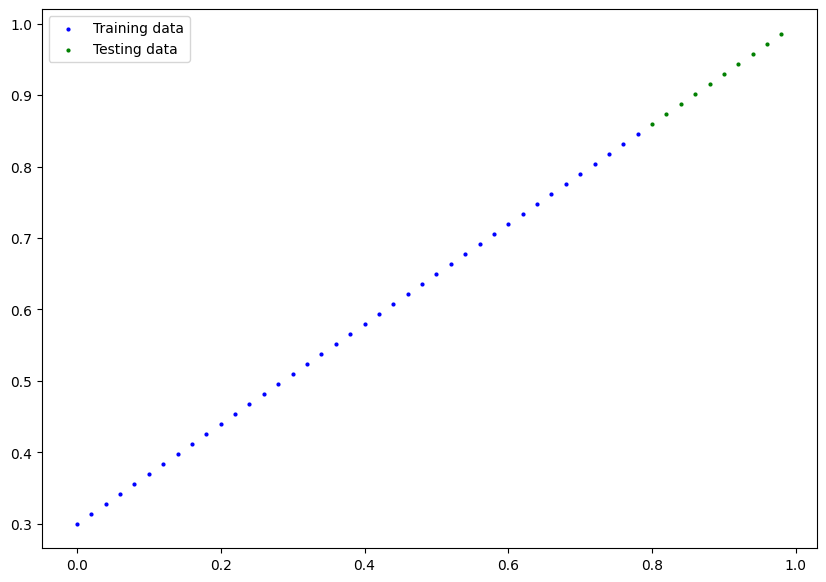

In [45]:
plot_predictions(X_train, y_train,X_test,y_test)

# LinearRegressionModel 
* creating a linear model by using a sub classing nn.Model
* step 1 of ML process

In [46]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self): # constructor
        super().__init__() # initialize the constructor 

        # use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, etc... 
        # This is using a pre-existing model 
        self.linear_layer = nn.Linear(in_features=1, # takes in input of size 1
                                      out_features=1) # output of size 1

        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# Training the data
Step 2 ML process:
* loss function (2.1)
* Optimizer (2.1)
* Training loop (2.2)
* Testing loop (2.2)


In [47]:
# moving the model to the gpu if available
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [48]:
# setting up loss function 2.1
loss_fn = nn.L1Loss()

# setting optimizer 2.1
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [49]:
# setting up the predictions
with torch.inference_mode():
    y_preds = model_1(X_train.to(device)) # all device must be on the same one.
y_preds[:5]

tensor([[0.8300],
        [0.8453],
        [0.8606],
        [0.8759],
        [0.8912]], device='cuda:0')

# Training Loop 
step 2.2

In [58]:
# training loop
torch.manual_seed(42)

epochs = 200
# putting data on device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train() # built in train in pytorch

    # 1. forward pass
    y_preds = model_1(X_train)

    # 2. calculating the loss
    loss = loss_fn(y_preds, y_train)

    # 3. optimizer.zero_grad()
    optimizer.zero_grad()  # clear the gradients from the last step (if any)
    
    # 4. perform backpropagation 
    loss.backward()

    # 5. optimizer step 
    optimizer.step() # this is what decides which way to move so that it can become closer to the hyperparameters (weight, bias)

    # Testing
    model_1.eval() # always put this when testing (good practice)
    with torch.inference_mode():
        test_pred = model_1 (X_test) # repeat step 1 with testing data
        test_loss = loss_fn(test_pred, y_test) # repeating step 2 with testing data

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}") 

    

Epoch: 0 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 10 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 20 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 30 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 40 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 50 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 60 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 70 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 80 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 90 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 100 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 110 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 120 | Loss: 0.007557580713182688 | Test Loss: 0.0013417780864983797
Epoch: 130 | Loss: 0.007557580713182

In [59]:
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6909]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2960], device='cuda:0'))]),
 0.7,
 0.3)

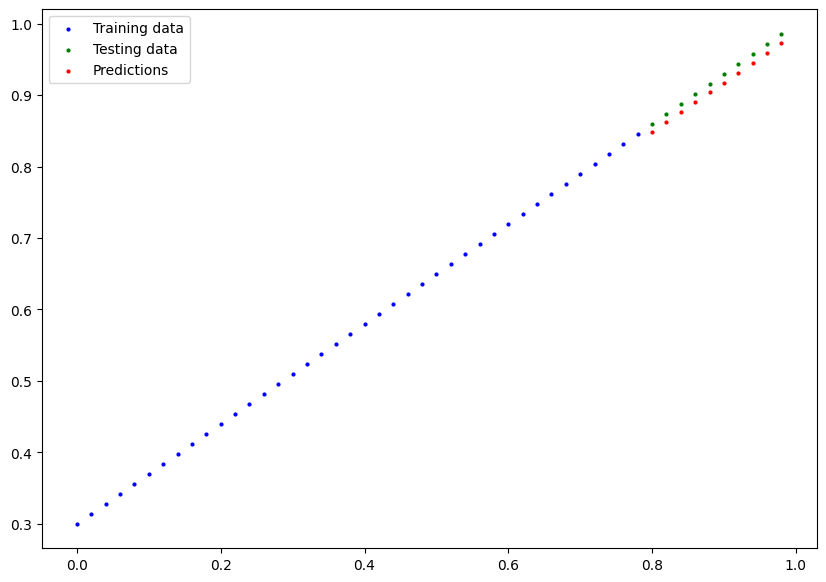

In [60]:
# visualizing how close we are
plot_predictions(predictions = test_pred.cpu())

# Saving and loading the model